# Evaluation of the Results for known CPs with fixed window size m (number of values) #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [40]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm
import orange3score

Let's load the scores from the different methods.

In [41]:
df_scores = pd.read_csv("./segmentation_covering_known_stumpy_m.csv")
df_scores = df_scores.iloc[:, [0,7,8,9,10,11]]
df_scores

,dataset,fluss1,fluss2,fluss3,fluss4,fluss5
0,Adiac,0.970755,0.903707,0.800740,0.873657,0.740361
1,ArrowHead,0.994702,0.980274,0.985497,0.985497,0.977673
2,Beef,0.935417,0.934085,0.768329,0.712773,0.659286
3,BeetleFly,0.967709,0.996880,0.663053,0.665424,0.969223
4,BirdChicken,0.477703,0.973781,0.980656,0.979890,0.480536
5,CBF,0.764311,0.736472,0.498540,0.616636,0.499564
6,Car,0.939744,0.874664,0.686785,0.760479,0.759522
7,Chinatown,1.000000,1.000000,1.000000,1.000000,1.000000
8,ChlorineConcentration,0.999744,0.999744,0.998463,0.581463,0.578676
9,CinCECGTorso,0.675982,0.664521,0.681064,0.612056,0.607689


Let's calculate the mean/median/std error.

In [42]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

fluss1: mean_error=71.78
fluss2: mean_error=72.3
fluss3: mean_error=70.55
fluss4: mean_error=66.79
fluss5: mean_error=67.06


In [43]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].median() * 100, 2)}")

fluss1: mean_error=72.93
fluss2: mean_error=72.29
fluss3: mean_error=67.0
fluss4: mean_error=61.21
fluss5: mean_error=61.64


In [44]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

fluss1: std_error=23.93
fluss2: std_error=23.69
fluss3: std_error=22.92
fluss4: std_error=23.52
fluss5: std_error=23.86


Let's compute the wins per method.

In [45]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_27182/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [46]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

fluss1:wins=38 rank=2.3
fluss2:wins=18 rank=2.5
fluss3:wins=19 rank=2.9
fluss4:wins=17 rank=3.1
fluss5:wins=16 rank=3.2


Let's plot and output the ranks.

In [47]:
cd = orange3score.compute_CD(means, df_scores.shape[0])
orange3score.graph_ranks(avranks=means, names=df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.2, filename="./ranks_known_fixed_m.png")


In [48]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

fluss1: rank=2.25333
fluss2: rank=2.50667
fluss3: rank=2.85333
fluss4: rank=3.05333
fluss5: rank=3.22667


Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [49]:
# for rival in df_scores.columns[1:]:
#     if rival == "ClaSP": continue
    
#     df_pair = df_scores[["ClaSP", rival]]
#     pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
#     wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
#     losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
#     ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
#     assert wins + losses + ties == pair_ranks.shape[0]
    
#     print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [50]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs fluss2: (wins/losses/ties): 25/40/10
fluss1 vs fluss3: (wins/losses/ties): 24/44/7
fluss1 vs fluss4: (wins/losses/ties): 22/46/7
fluss1 vs fluss5: (wins/losses/ties): 23/45/7


/tmp/ipykernel_27182/3886744767.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_27182/3886744767.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


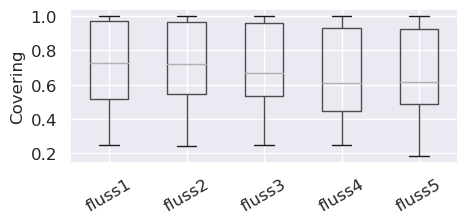

In [51]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_known_fixed_m.png", bbox_inches="tight")